<h1>Customer Churn Prediction</h1>

## 1. An Introduction
- Customer churn prediction is a critical aspect of business management, particularly for industries like telecommunications, internet service providers, pay TV companies, insurance firms, and alarm monitoring services. It involves understanding and addressing customer attrition, which refers to the loss of clients or customers.
- For businesses in these sectors, measuring customer attrition is a vital business metric. This is because retaining an existing customer is significantly more cost-effective than acquiring a new one. As a result, these companies often have customer service branches dedicated to re-engaging customers who are considering leaving. This is because the long-term value of recovered customers far outweighs that of newly acquired ones.
- To address customer churn, predictive analytics comes into play, churn prediction models to assess the likelihood of customers leaving. These models prioritize a small list of potential defectors, enabling businesses to concentrate their customer retention efforts on those who are most at risk of churning.


## 2. Importing Library

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Reading The File

In [15]:
train_data = pd.read_csv("churn-bigml-80.csv")
test_data = pd.read_csv("churn-bigml-20.csv")

train_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- State: The state where the customer resides, represented by a two-letter code.
- Account length: The number of days the customer has been with the current telecom provider.
- Area code: The area code for the customer's phone number.
- International plan: Indicates whether the customer has an international calling plan (Yes or No).
- Voice mail plan: Indicates whether the customer has a voice mail plan (Yes or No).
- Number vmail messages: The number of voice mail messages the customer has.
- Total day minutes: The total number of minutes the customer has used during the day.
- Total day calls: The total number of calls the customer has made during the day.
- Total day charge: The total charges incurred by the customer for day-time usage.
- Total eve minutes: The total number of minutes the customer has used during the evening.
- Total eve calls: The total number of calls the customer has made during the evening.
- Total eve charge: The total charges incurred by the customer for evening usage.
- Total night minutes: The total number of minutes the customer has used during the night.
- Total night calls: The total number of calls the customer has made during the night.
- Total night charge: The total charges incurred by the customer for night-time usage.
- Total intl minutes: The total number of international minutes the customer has used.
- Total intl calls: The total number of international calls the customer has made.
- Total intl charge: The total charges incurred by the customer for international usage.
- Customer service calls: The number of calls the customer has made to customer service.
- Churn: Indicates whether the customer has churned (Yes or No)

## 4. Checking The Data

In [16]:
train_data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [17]:
train_data.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

## 5. Analysis

### 5.1. Churn Rate

#### 5.1.1. Churn rate of all customers

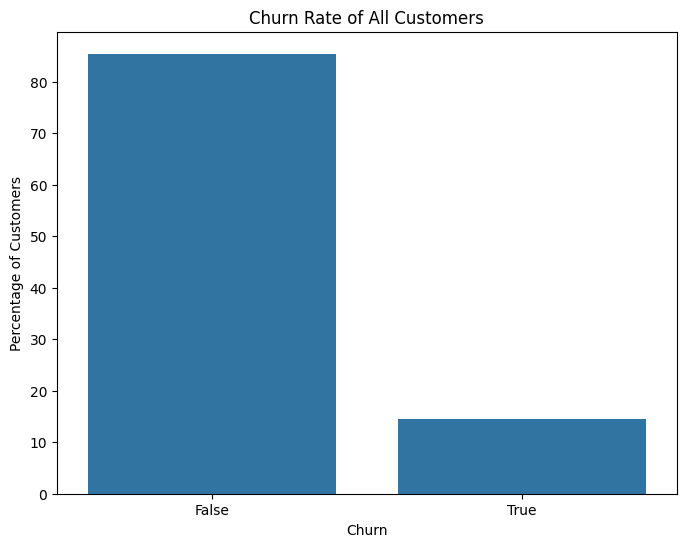

In [18]:
# Calculate churn rate
churn_rate = train_data['Churn'].value_counts(normalize=True) * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.xlabel('Churn')
plt.ylabel('Percentage of Customers')
plt.title('Churn Rate of All Customers')
plt.show()


- Looking at the chart, we can see that the percentage of customers who have not abandoned the service is quite high (about over 80%), while more than 10% of customers have abandoned the service.

### 5.2. Analyze Service Usage Behavior

#### 5.2.1. Find out whether churning customers tend to call more or less during the day, evening, and night than non-churning customers?

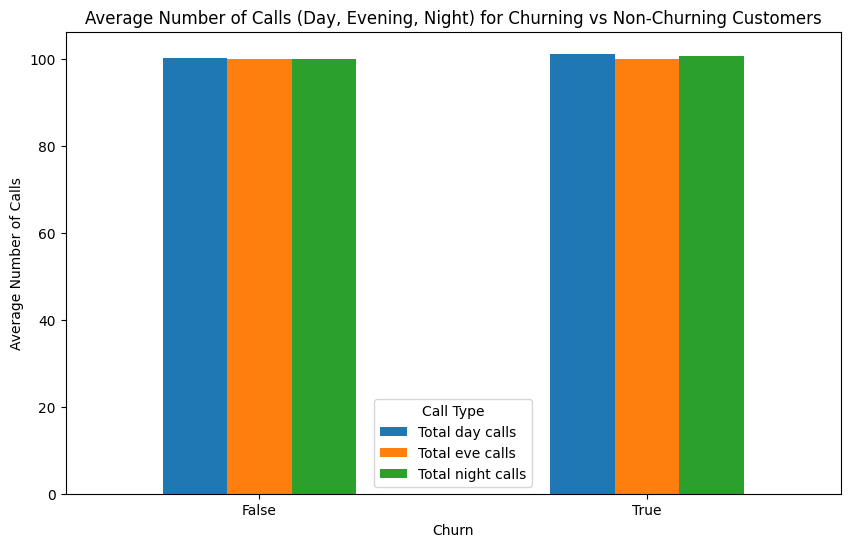

In [19]:
# Group the data by 'Churn' and calculate the mean of call counts
call_counts = train_data.groupby('Churn')[['Total day calls', 'Total eve calls', 'Total night calls']].mean()

# Create a bar chart
call_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Churn')
plt.ylabel('Average Number of Calls')
plt.title('Average Number of Calls (Day, Evening, Night) for Churning vs Non-Churning Customers')
plt.xticks(rotation=0)
plt.legend(title='Call Type')
plt.show()


- From the chart above, it can be seen that the number of calls (whether during the day, evening or night) has no significant difference between churning and non-churning customers.
- Call volume is not the main factor influencing whether a customer churns or not. Therefore, to reduce churn rate, it is necessary to consider other factors such as call duration, service plan (voice mail, international plan), and customer service satisfaction level.

#### 5.2.2. Find out whether churning customers tend to make more customer service calls than non-churning customers?

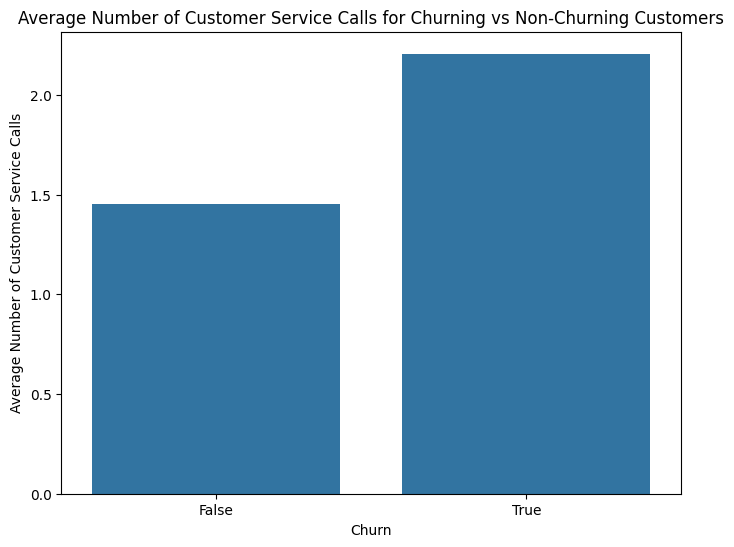

In [20]:
# Group the data by 'Churn' and calculate the mean of customer service calls
customer_service_calls = train_data.groupby('Churn')['Customer service calls'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_service_calls.index, y=customer_service_calls.values)
plt.xlabel('Churn')
plt.ylabel('Average Number of Customer Service Calls')
plt.title('Average Number of Customer Service Calls for Churning vs Non-Churning Customers')
plt.show()

- Churning customers have a higher average number of calls to customer service than non-churning customers.
- This shows that churning customers are more likely to call customer service.
- A high number of calls to customer service can be a sign of dissatisfaction or problems with service.
- Customers often call customer service multiple times when they encounter unresolved problems or are dissatisfied with the service received.

### 5.3. Service Cost Analysis

#### 5.3.1. Does the total cost (day charge, eve charge, night charge, intl charge) affect the customer's churn decision?

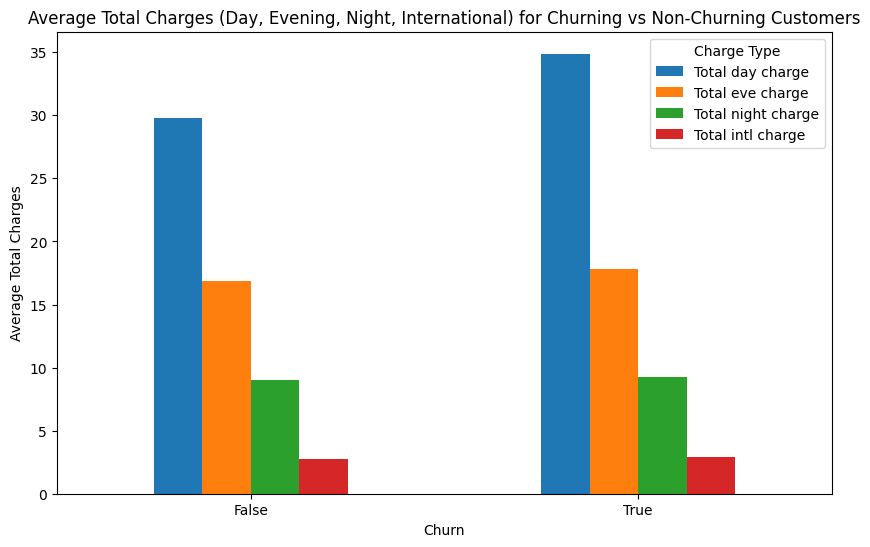

In [21]:
# Group the data by 'Churn' and calculate the mean of total charges
total_charges = train_data.groupby('Churn')[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']].mean()

# Create a bar chart
total_charges.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Churn')
plt.ylabel('Average Total Charges')
plt.title('Average Total Charges (Day, Evening, Night, International) for Churning vs Non-Churning Customers')
plt.xticks(rotation=0)
plt.legend(title='Charge Type')
plt.show()

- The chart indicates that there is no significant difference in the total charges (day, evening, night, and international) between churning and non-churning customers. This suggests that call charges alone may not be a key determinant of customer churn, and other factors might be contributing to why customers decide to leave.

#### 5.3.2. Find out if customers with higher total costs have higher or lower churn rates?

C:\Users\Admin\AppData\Local\Temp\ipykernel_24364\1121470135.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_charge = train_data_copy.groupby('Charge Group')['Churn'].value_counts(normalize=True).unstack()


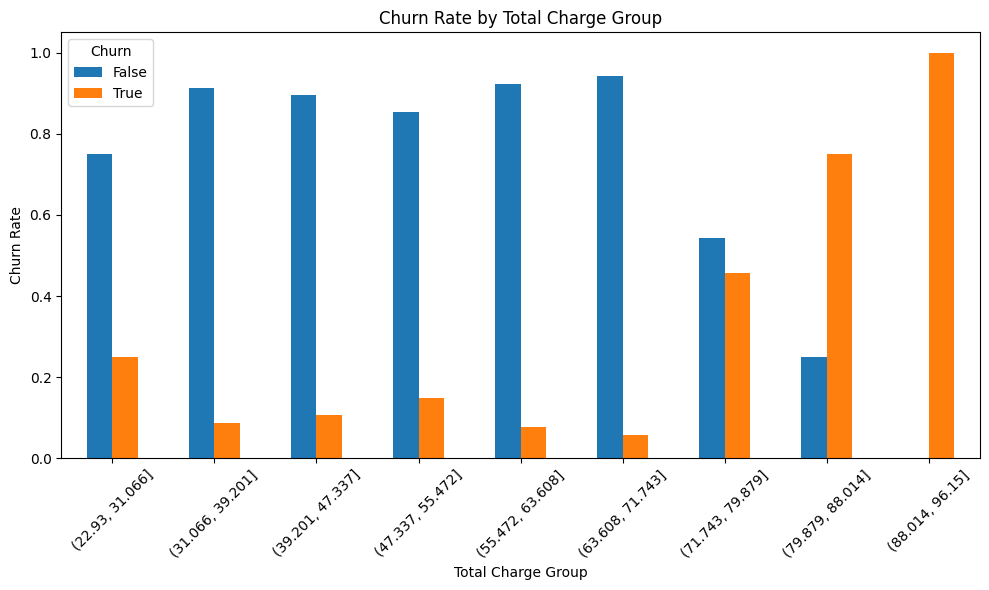

In [22]:
# Calculate total charges for each customer
train_data_copy = train_data.copy()

train_data_copy['Total Charges'] = train_data_copy['Total day charge'] + train_data_copy['Total eve charge'] + \
                             train_data_copy['Total night charge'] + train_data_copy['Total intl charge']

# Bin the total charges into groups
bins = np.linspace(train_data_copy['Total Charges'].min(), train_data_copy['Total Charges'].max(), 10)
train_data_copy['Charge Group'] = pd.cut(train_data_copy['Total Charges'], bins=bins)

# Calculate churn rate for each charge group
churn_by_charge = train_data_copy.groupby('Charge Group')['Churn'].value_counts(normalize=True).unstack()

# Create a bar chart
churn_by_charge.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Total Charge Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Total Charge Group')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- Low cost group (22.93 - 31,066): Non-churn customers account for a high rate, while the churn rate of customers is significantly lower.
- Average cost group (31,066 - 71,143): These groups show a similar pattern: the rate of non-churn customers dominates, while the rate of churn customers is very low.
- High cost group (71,143 - 79,879): The rate of customer churn begins to increase compared to the average cost group, while the rate of non-churn customers decreases.
- Very high cost group (79,879 - 96.15): The customer churn rate is the highest in all groups, far exceeding the non-churn customer rate. This shows that customers with very high total costs tend to churn more.
- => Conclusion: The graph shows that customers with high total costs are more likely to churn. While the low and medium total cost groups mainly consist of non-churn customers, customer churn increases sharply in the high total cost groups. This suggests that high costs may be a major factor in customers deciding to churn.

### 5.4. Customer Service Analysis

#### 5.4.1. Does the number of calls to customer service have anything to do with churn rate?

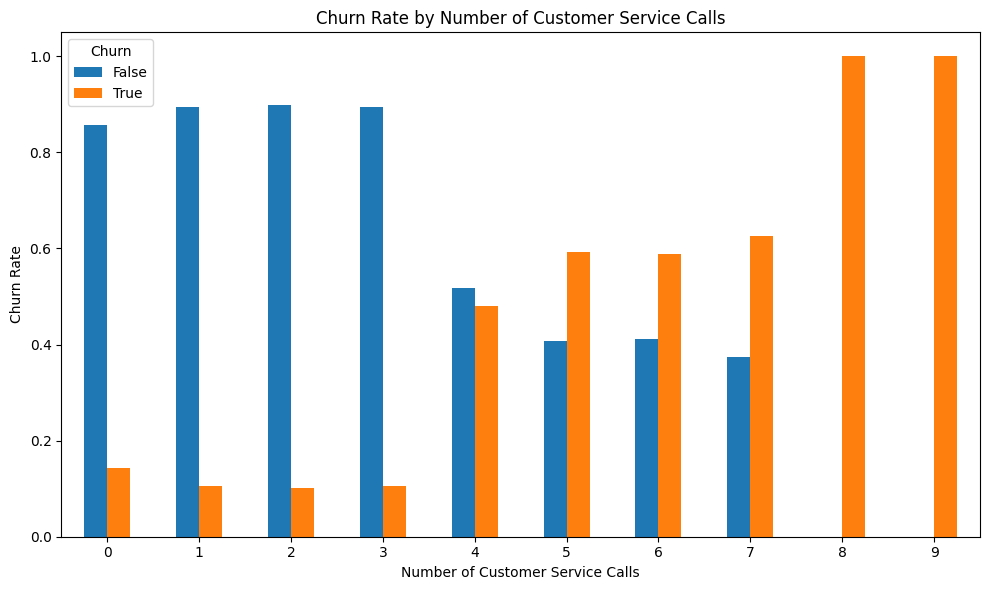

In [23]:
# Group the data by 'Customer service calls' and calculate churn rate
churn_by_cs_calls = train_data.groupby('Customer service calls')['Churn'].value_counts(normalize=True).unstack()

# Create a bar chart
churn_by_cs_calls.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- High cancellation rates: The chart shows high cancellation rates, especially for customers with many customer service calls. This suggests that there is a negative relationship between the number of customer service calls and service cancellation rates. Customers with more customer service calls are more likely to cancel service.
- Customers who have many customer service calls may experience many problems with the product or service. This can lead to frustration and eventual cancellation of the service.
- Customers who have many customer service calls may feel that they are not receiving good customer service. This can also lead to frustration and eventual cancellation of the service.

### 5.5. HeatMap

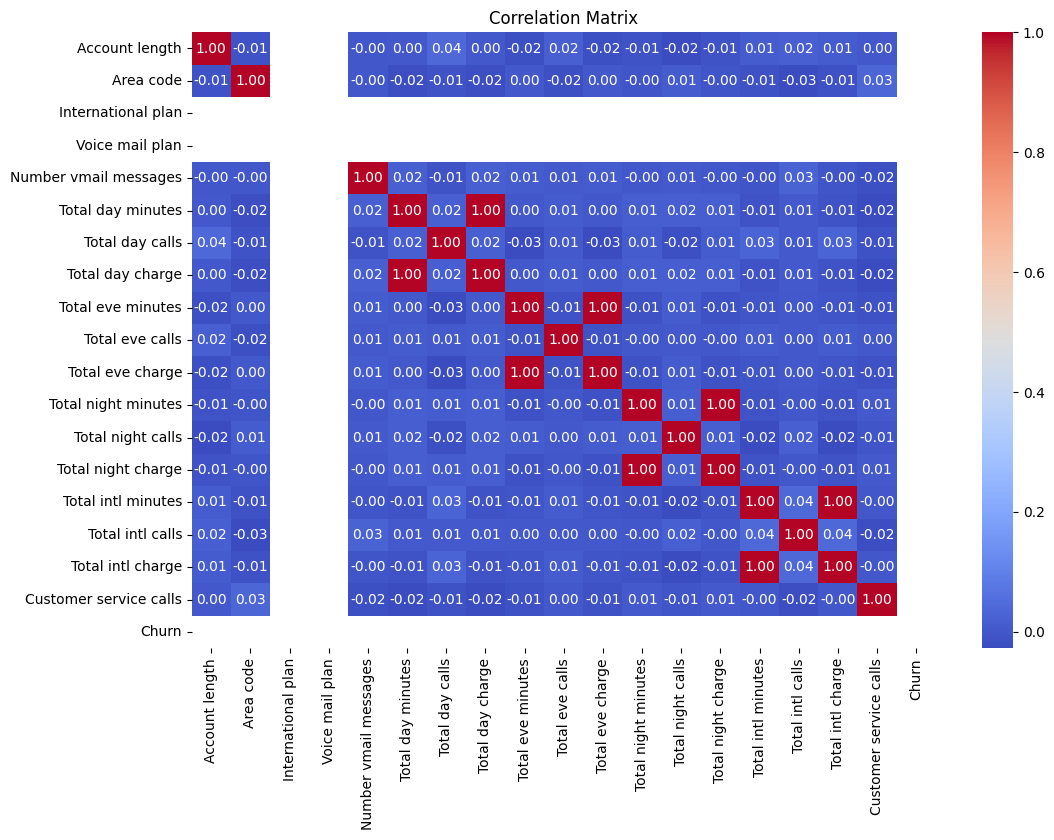

In [24]:
data = train_data.drop(columns=['State'])

# Convert categorical variables to binary
data['International plan'] = data['International plan'].apply(lambda x: 1 if x == 'yes' else 0)
data['Voice mail plan'] = data['Voice mail plan'].apply(lambda x: 1 if x == 'yes' else 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'True' else 0)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 6. Conclusion
- Churn Rate: A significant portion of customers (over 10%) have churned, indicating a need for retention strategies.
- Service Usage: Call volume alone doesn't strongly predict churn. However, churning customers tend to make more customer service calls, suggesting dissatisfaction or unresolved issues.
- Service Cost: While total charges don't differ significantly between churned and retained customers, those with very high costs are more likely to churn, highlighting the importance of cost-effectiveness.
- Customer Service: A strong negative correlation exists between the number of customer service calls and churn rate. Addressing customer service issues and improving satisfaction are crucial for reducing churn.
- Recommendations: 
    - Proactively address customer service issues to prevent escalation and dissatisfaction.
    - Offer cost-effective plans and promotions to retain price-sensitive customers.
    - Implement targeted retention strategies for high-risk customers, such as those with high costs or frequent customer service interactions.
    - Continuously monitor customer satisfaction and feedback to identify areas for improvement.

## 7. Modeling

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select relevant features based on heatmap
train_data['International plan'] = train_data['International plan'].apply(lambda x: 1 if x == 'yes' else 0)
train_data['Voice mail plan'] = train_data['Voice mail plan'].apply(lambda x: 1 if x == 'yes' else 0)
test_data['International plan'] = test_data['International plan'].apply(lambda x: 1 if x == 'yes' else 0)
test_data['Voice mail plan'] = test_data['Voice mail plan'].apply(lambda x: 1 if x == 'yes' else 0)

# Select relevant features based on heatmap and multicollinearity considerations
features = ['International plan', 'Voice mail plan', 'Total day minutes', 'Total eve minutes',
            'Total night minutes', 'Total intl minutes', 'Customer service calls']

# Prepare data
X_train = train_data[features]
# The lambda function was comparing to the string 'True' when it should be comparing to the boolean True
y_train = train_data['Churn'].apply(lambda x: 1 if x == True else 0)
X_test = test_data[features]
y_test = test_data['Churn'].apply(lambda x: 1 if x == True else 0)

# Create and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.8515742128935532

Confusion Matrix:
 [[563   9]
 [ 90   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       572
           1       0.36      0.05      0.09        95

    accuracy                           0.85       667
   macro avg       0.61      0.52      0.51       667
weighted avg       0.79      0.85      0.80       667

